In [3]:
# import necessary libraries.
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# For .csv file upload.
from google.colab import files
from IPython import display
 
uploaded = files.upload()

Saving tweet_counts.csv to tweet_counts.csv


## Problem 1: Bayesian Inference

**Part a) Read tweet counts.csv file and define two variables which represent the week number and weekly tweet counts. What is the average number of weekly tweets over the last year? This is the horizontal line, I have plotted in the figure above.**

In [4]:
# Read the csv file for tweets
tweets = pd.read_csv("tweet_counts.csv")

# print some lines for it
tweets.head()


,week,count
0,1,39.0
1,2,46.0
2,3,41.0
3,4,42.0
4,5,31.0


In [5]:
# print total dataframe length
len(tweets)

52

In [6]:
# Define two variables that represent week number and weekly tweet counts
weeks = tweets['week']
counts = tweets['count']

# what is the average number of weekly count
avg_count = np.mean(counts)

print("Average number of weekly count is:{}".format(avg_count))

Average number of weekly count is:38.76923076923077


**b) Use matplotlib.pyplot.bar to create the same figure shown above.**

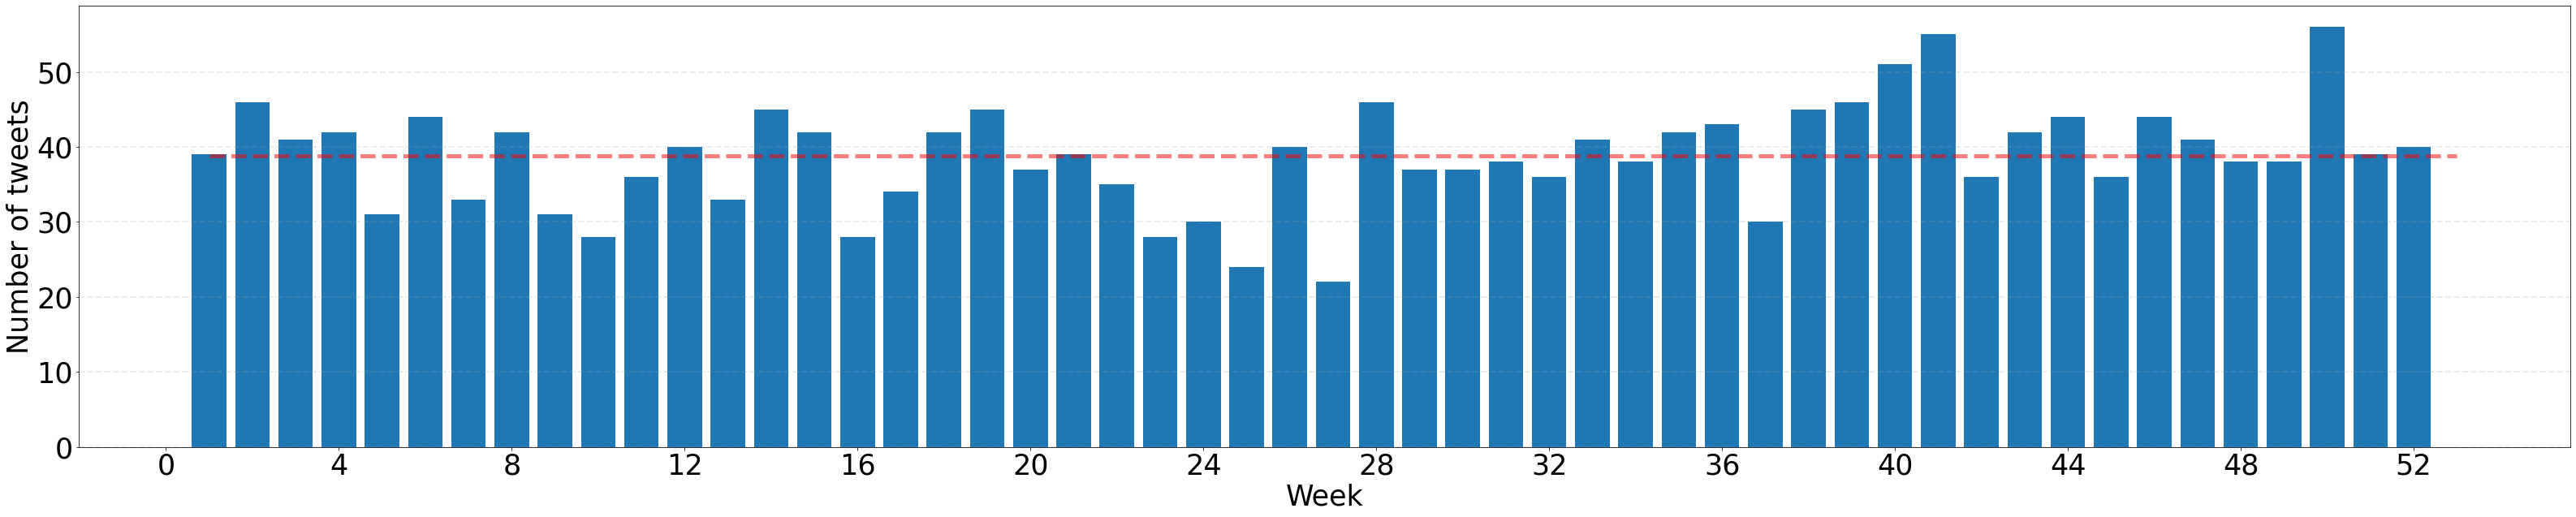

In [7]:
# Plot graph of tweets

# Set the fonts and figure size.
plt.figure(figsize=(55,10))
font = {'size'   : 35}
matplotlib.rc('font', **font)

# set ticks for per 4 weeks.
plt.xticks([4*x for x in range(0,14)],[4*x for x in range(0,14)])

# plot average tweet line.
plt.plot([1, 53], [avg_count,avg_count], "k--", alpha=0.5, color='red',linewidth=5)

# Bar plot for tweeter data
plt.bar(list(weeks),list(counts),width=0.8)
plt.xlabel("Week")
plt.ylabel("Number of tweets")
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
plt.show()

**c) Prove explicitly that the expected value of λ is 1/α**

Saving 1c.jpg to 1c.jpg


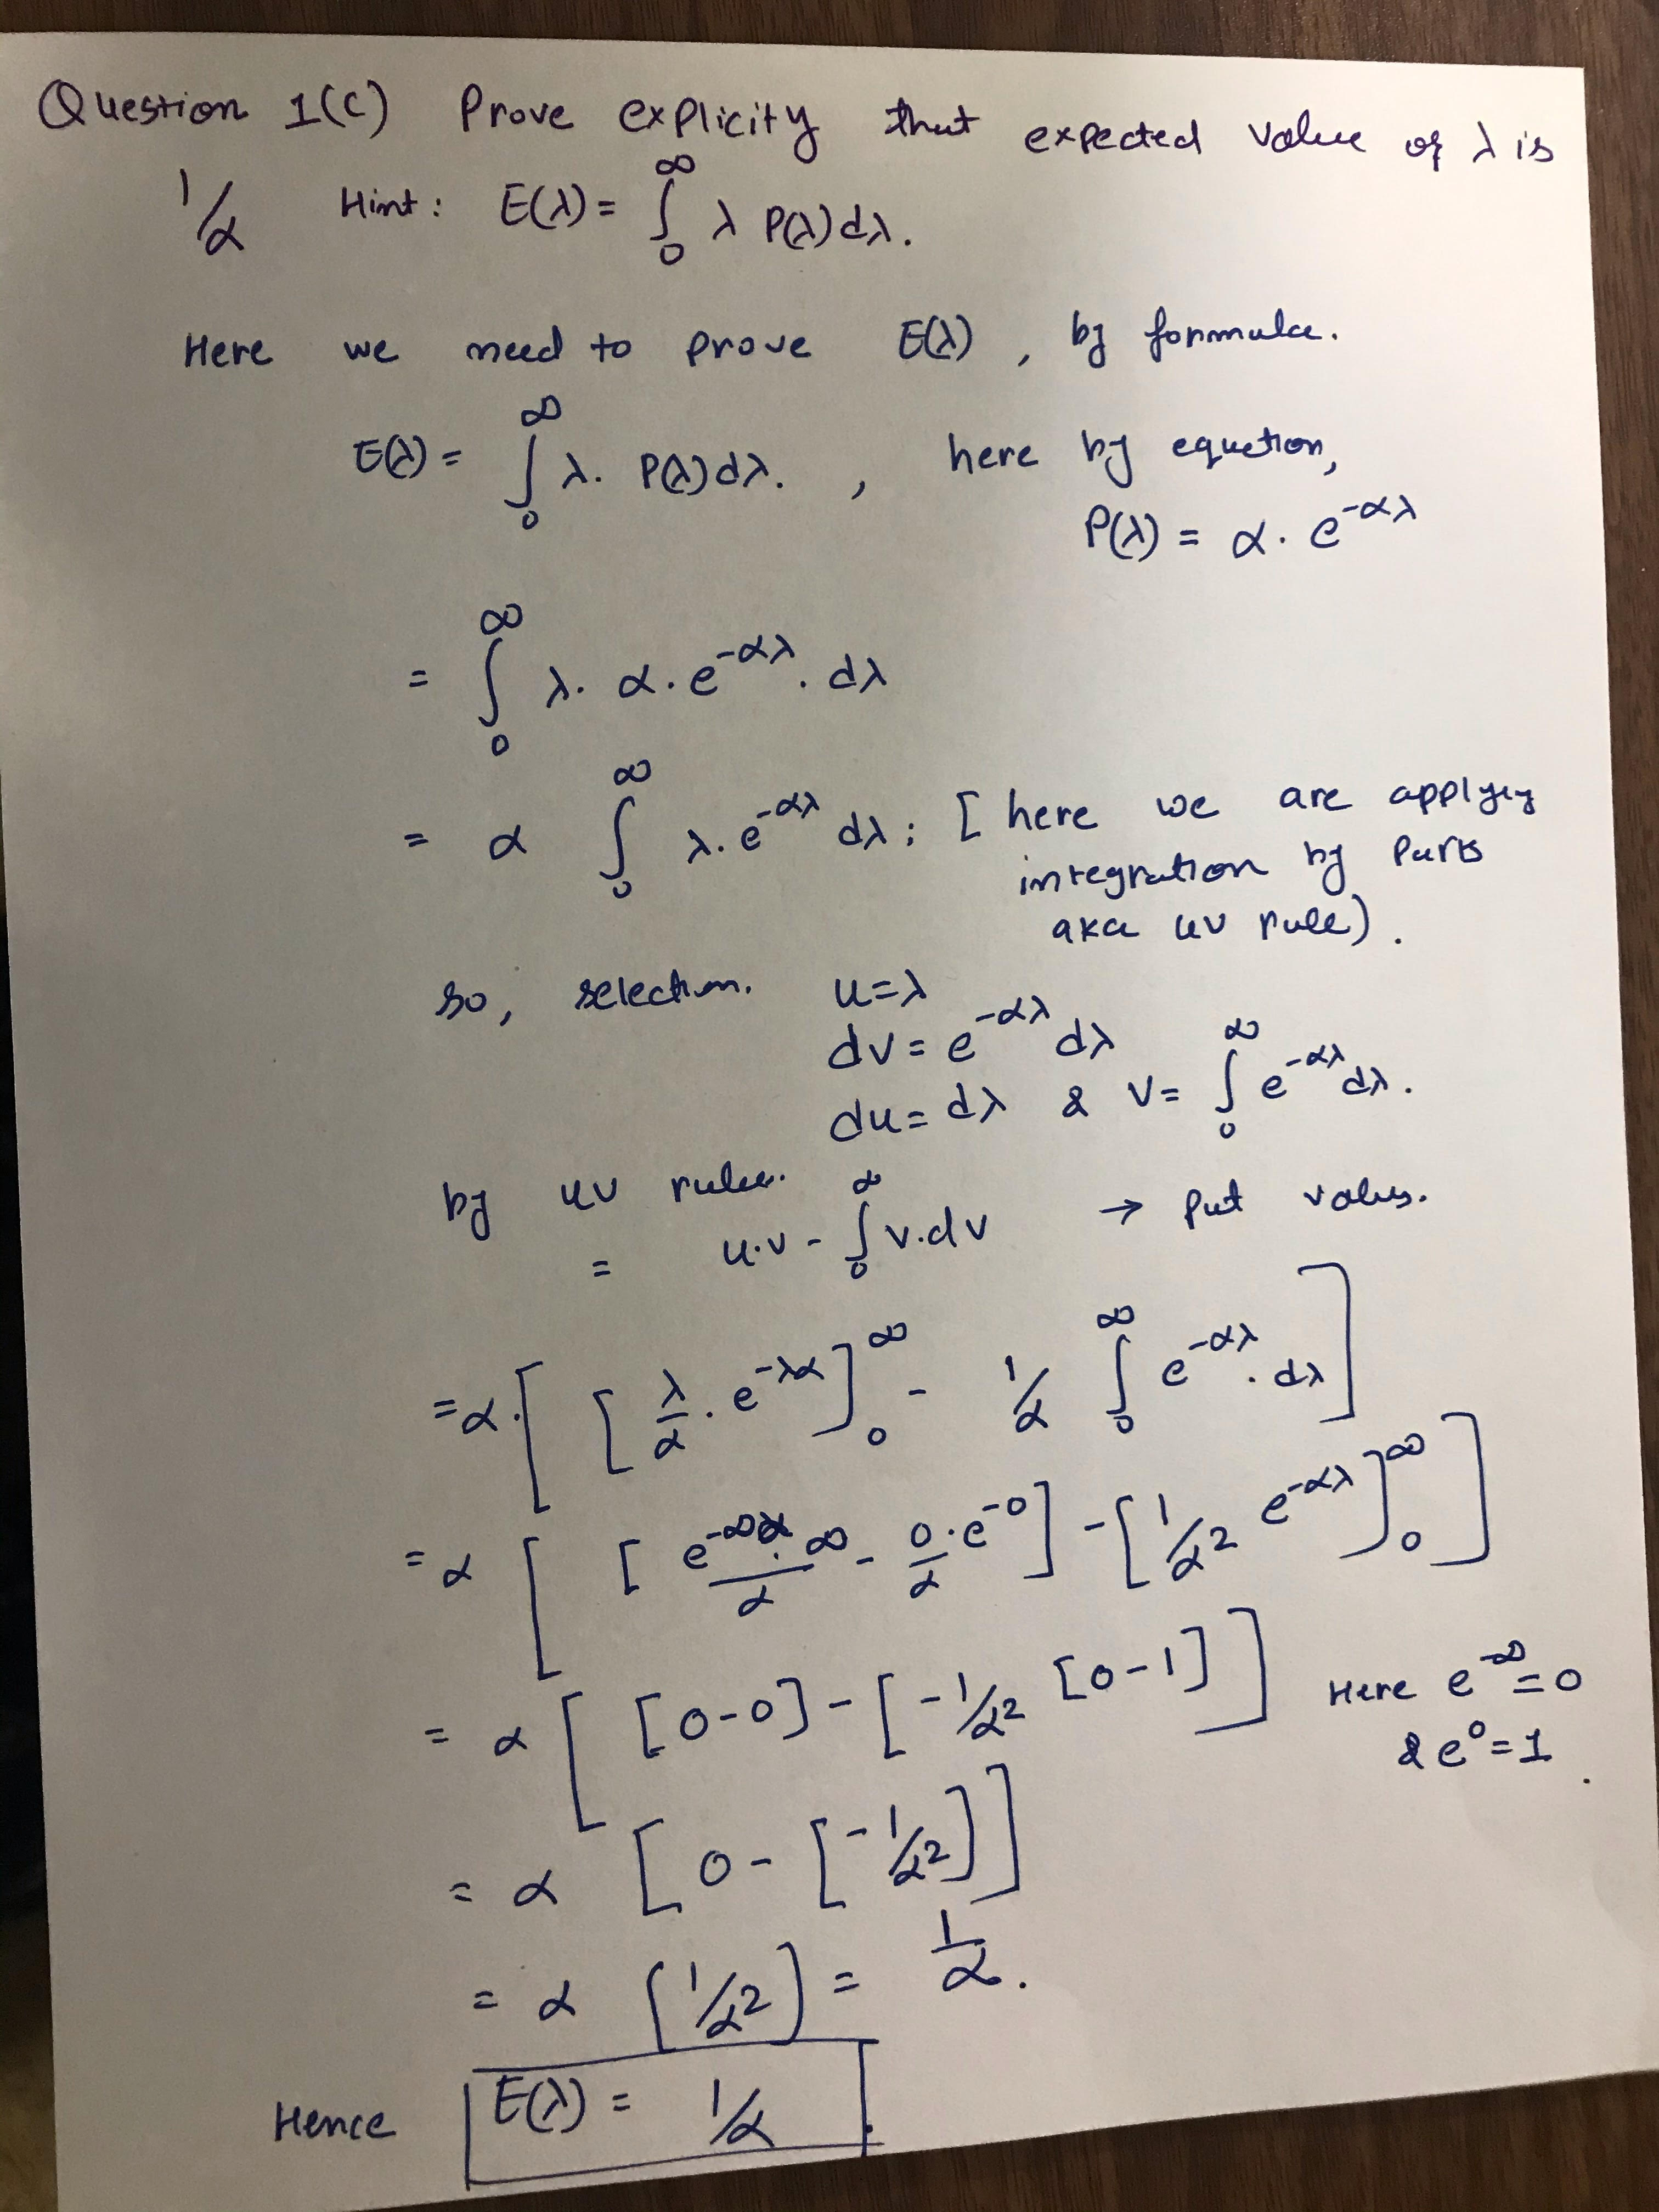

In [8]:
# Proof in handwritten file
 
uploaded = files.upload()
display.Image("1c.jpg",width=500)

**d) Take the average value of λ from part ”a” to estimate α. Plot the estimated
distribution function (P(λ) vs λ).**

In [9]:
# Get average vale and estimate alpha

alpha = 1 / np.average(counts)
print("alpha value is :{}".format(alpha))

alpha value is :0.025793650793650796


In [10]:
# Define exponential function for P(λ)=α*e^−α*λ
exponential=lambda l,a: a * np.exp(-l*a)

# make it vectorized for vector use
exponential=np.vectorize(exponential)

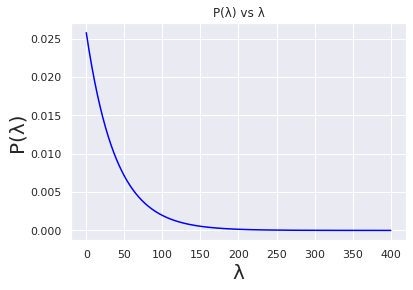

In [11]:
# use default set for nice pot
sns.set()

# now plot P(λ) vs λ
lambda_sample = np.linspace(0,400,1000)
exp_value = exponential(lambda_sample, alpha)

plt.plot(lambda_sample, exp_value, color = "blue")
plt.xlabel('λ', fontsize=20)
plt.ylabel('P(λ)', fontsize=20)

plt.title("P(λ) vs λ")

# show plot
plt.show()

**e) Use numpy.linspace to create two variables with 1 × 50 array in the interval of 25
and 50. These variables are defined as the model space that we want to search for
posterior of λ1 and λ2. You have also defined an array in part a which shows the
week number. This provides a space for W S . Consider all these points as a 3-D
mesh-grid, how can we find posterior for each point in the 3-D space given all the
information you have? Use Bayes’ theorem to elaborate your method in detail.**

Based on bayer's theorem:
Posterior ∝ Likelihood * Prior Probablity

Here P(hypothesis| Given data) ∝ P(Given data| hypothesis) * P(hypothesis)

Here hypothesis are λ1,λ2 and ws( the week when bob's tweeting habit changes) with respect to k ( tweet count) 

so as per Bayer's theorem, P(λ1,λ2,ws | k) ∝ P(k|λ1,λ2,ws) * P(λ1) * P(λ2) * P(ws)

For finding P(λ1) we have equation. also P(k) is poisson distribution and it equation is given. 

In [12]:
# create variable for λ1,λ2,ws by using linespace
l1_est = np.linspace(25,50,50)
l2_est = np.linspace(25,50,50)
w_est = np.arange(1,53,1)

In [13]:
# create 3D meshgrid by using all variables 
l1_est_mesh,l2_est_mesh,ws_est_mesh =  np.meshgrid(l1_est,l2_est,w_est)

**f) Write a code to find marginalized-posterior for λ1, λ2 and W S . Plot posteriors
for λ1 and λ2 in the same figure and create a bar plot for posterior of W S in a
separate figure. Running your code for this part may take a long time since you
compute posterior for every single point in your model space. However, we will
learn more efficient way, Markov chain Monte Carlo (MCMC), later in the next
homework.**

In [14]:
# define poisson function 
poisson=lambda k,l: ((l**k)*np.exp(-l))/(np.math.factorial(k))
poisson=np.vectorize(poisson)

# define Posterior function
def posterior(l1,l2,ws):
  """
  takes hypothesis as an input and probabliy as output. alpha is an average tweet count.
  """
  p = 1
  for i in counts[weeks<ws]:
    p = p * np.prod(poisson(i,l1) * exponential(l1,alpha))
  for j in  counts[weeks>=ws]:
    p = p * np.prod(poisson(j,l2) * exponential(l2,alpha))
  return p 

# make this function vectorize
posterior=np.vectorize(posterior)

In [15]:
# Now find unnoramalized marginalized-posterior for λ1,λ2,ws 
Post = posterior(l1_est_mesh,l2_est_mesh,ws_est_mesh)

In [16]:
# Check marginalized-postrior probablity dimentions
Post.shape

(50, 50, 52)

In [17]:
# find and plot unnormalized marginalized posterior 
posterior_of_lambda1 = np.sum(np.sum(Post, axis=2), axis=1)
posterior_of_lambda2 = np.sum(np.sum(Post, axis=2), axis=0)
posterior_of_ws = np.sum(np.sum(Post, axis=1), axis=0)

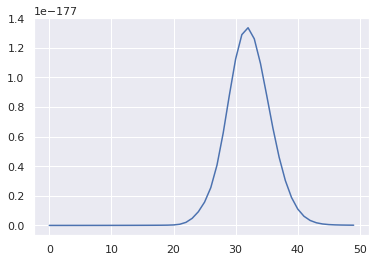

In [18]:
# Plot graph for λ1
plt.plot(posterior_of_lambda1)

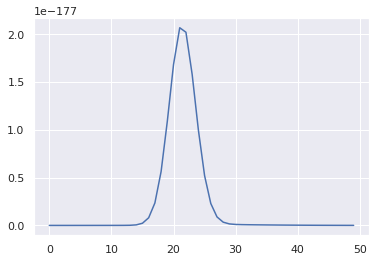

In [19]:
# Plot graph for λ2
plt.plot(posterior_of_lambda2)

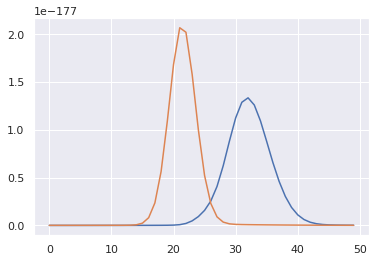

In [20]:
# Now plot both graph ont the same axis
plt.plot(posterior_of_lambda1)
plt.plot(posterior_of_lambda2)
plt.show()

<BarContainer object of 52 artists>

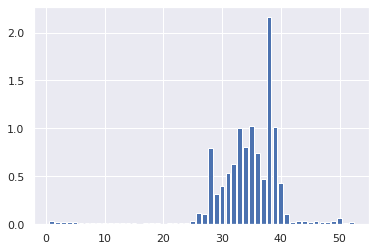

In [21]:
# Plot Ws in seprate figure
normalized_ws_val  = posterior_of_ws*(10 ** 177)
plt.bar([x for x in range(1,53)],normalized_ws_val)

**All Above, postriors are un-noramalized, now find normalized unmarginalized posterior for all λ1,λ2,ws** 

In [22]:
# Now find noramlized unmarginalized posterior for λ1,λ2,ws 
norm_const_lambda1 = np.trapz(posterior_of_lambda1, l1_est)
norm_const_lambda2 =  np.trapz(posterior_of_lambda2, l2_est)
norm_const_ws = np.trapz(posterior_of_ws, w_est)

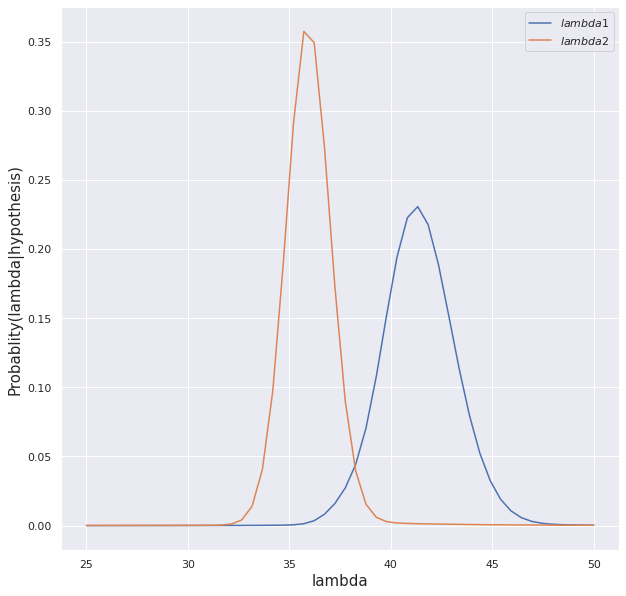

In [23]:
# Now plot normalized unmarignalized postriors
norm_posterior_of_lambda1  = posterior_of_lambda1 / norm_const_lambda1
norm_posterior_of_lambda2  = posterior_of_lambda2 / norm_const_lambda2
norm_posterior_of_ws  = posterior_of_ws / norm_const_ws

# for lambda1 plot

plt.figure(figsize=(10,10))

plt.plot(l1_est,norm_posterior_of_lambda1, label ='$lambda1$')
plt.plot(l2_est,norm_posterior_of_lambda2, label ='$lambda2$')
plt.legend(loc='best')

plt.xlabel('lambda',fontsize=15)
plt.ylabel('Probablity(lambda|hypothesis)',fontsize=15)


plt.show()

<BarContainer object of 52 artists>

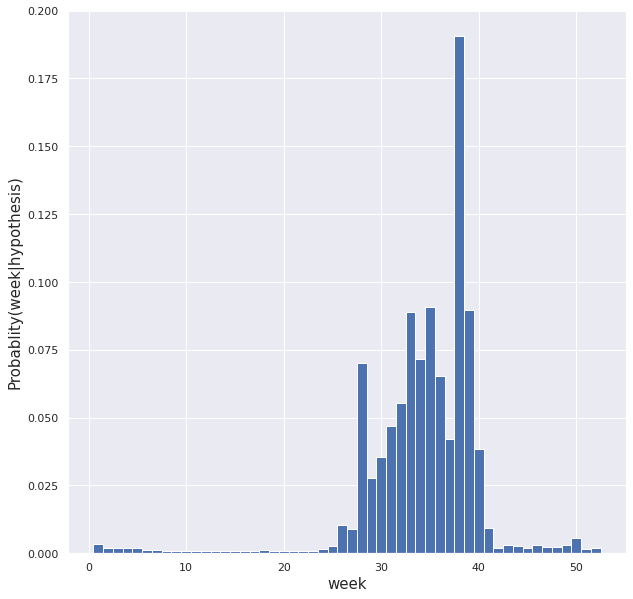

In [24]:
# noramalize plot for week
plt.figure(figsize=(10,10))
plt.xlabel('week',fontsize=15)
plt.ylabel('Probablity(week|hypothesis)',fontsize=15)
plt.bar([x for x in range(1,53)],norm_posterior_of_ws,width=1.0)

**g) How is your belief updated about a sudden change in Bob’s tweeting habit?
Can you estimate the week when tweeting pattern changed? Use marginalized 2-D
posteriors of λ1 and λ2 to obtain P(λ 2 − λ 1 > 5). This shows the probability that
Bob’s weekly tweet counts has increased by five at some point.**

In [25]:
# So find The maximum value of normalized marginalzed norm_posterior_of_ws to find out week estimation
estimated_week_for_pattern_change = np.argmax(norm_posterior_of_ws)
print("Bob's tweeting pattern change estimation at week: {}".format(estimated_week_for_pattern_change))

Bob's tweeting pattern change estimation at week: 37


Use marginalized 2-D
posteriors of λ1 and λ2 to obtain P(λ 2 − λ 1 > 5). This shows the probability that
Bob’s weekly tweet counts has increased by five at some point.

In [26]:
# Now find  P(λ 2 − λ 1 > 5)

# join probablity of lambda1 and lambda2 from posterior.
join_2d_prob_l1_l2 = np.sum(Post, axis=2)

In [27]:
join_2d_prob_l1_l2

array([[3.38421538e-245, 1.24854045e-240, 1.86981784e-235, ...,
        1.61274630e-214, 3.29206244e-217, 5.46300286e-220],
       [1.99377978e-240, 2.50261426e-239, 4.38019165e-235, ...,
        2.25035189e-214, 4.61610660e-217, 7.70195371e-220],
       [3.60729551e-235, 6.99231728e-235, 8.26122977e-234, ...,
        3.11334787e-214, 6.42048370e-217, 1.07755585e-219],
       ...,
       [1.62860528e-210, 4.45705747e-208, 8.32704427e-206, ...,
        7.01582407e-212, 1.15735086e-212, 6.63255239e-213],
       [1.60550909e-211, 4.41001380e-209, 8.30340135e-207, ...,
        1.39855963e-212, 1.25832747e-214, 2.02004359e-215],
       [1.41995932e-212, 3.91858190e-210, 7.48175974e-208, ...,
        7.00019809e-213, 2.40184566e-215, 1.82158948e-217]])

In [28]:
# check the shape for it.
join_2d_prob_l1_l2.shape

(50, 50)

In [33]:
# get values for lambda1 and lambda2.
lambda1_range = [x for x in range(25,50)]
lambda2_range = [x for x in range(25,50)]

un_noramlized_sum = 0

# iterate through lambda1 and lambda2 values.
for j in lambda2_range:
  for i in lambda1_range:
    if (j-i > 5):
      un_noramlized_sum += join_2d_prob_l1_l2[j][i]

# Print unnormalized marginalized probablity
un_noramlized_sum

5.225090305701821e-178

In [35]:
# Now find normalized marginilazied probabilty of  P(λ 2 − λ 1 > 5)
norm_const_for_lambda1_lambdaa2 =np.sum(np.sum(join_2d_prob_l1_l2, axis=1), axis=0)
# find normalized probablity.
normalized_sum_for_l1_l2_5 = un_noramlized_sum / norm_const_for_lambda1_lambdaa2

# print normalized probablity of  P(λ 2 − λ 1 > 5)
normalized_sum_for_l1_l2_5

0.04602969863706635

## Problem 2: A simple dimentionality reduction

**a) Create a 10 × 2 NumPy array which contains all elements in D. Find the covari-
ance matrix of D using numpy.cov**

In [36]:
# Create array that contains all elements in D

array_D = np.array([[1.72,0.10],[-0.58,0.31],[1.99,1.54],[1.60,4.97],[2.72,2.43],[2.83,3.59],[5.95,7.71],[4.75,7.63],[5.57,5.60],[9.82,7.91]])

# find covariance matrix of D
CovD = np.cov(array_D.T)

In [37]:
# print covariance matrix.
CovD

array([[8.70742333, 7.41923   ],
       [7.41923   , 9.21336556]])

**b) Find eigenvalues and corresponding eigenvectors of the covariance matrix using
NumPy linear algebra function. Which eigenvector shows the direction with the
most variance? Name this vector v.**

In [38]:
# Find eigen value and eigen vector
eigen_values, eigen_vectors = np.linalg.eig(CovD)

print("first vector, Eigen Values:{} and Eigen Vectors:{}".format(eigen_values[0],eigen_vectors[:,0]))
print("second vector, Eigen Values:{} and Eigen Vectors:{}".format(eigen_values[1],eigen_vectors[:,1]))


first vector, Eigen Values:1.5368529596841682 and Eigen Vectors:[-0.71905385  0.69495436]
second vector, Eigen Values:16.383935929204718 and Eigen Vectors:[-0.69495436 -0.71905385]


By looking at above eigen values, second vector [-0.69495436 -0.71905385] has a highest value of 16.383935929204718 so say this vector as v.



In [39]:
v = eigen_vectors[:,1]

**c) Use the dot product of matrix D and v to map all the data points to a direction
which corresponds to the most variance. Now, you have a 1-D data set instead of
2-D and you preserved most of the information regarding the relative position of
data points in 2-D space. In other words, the data points which are close in 2-D
space, are still close pairs in 1-D space. The figure below shows my own results for
eigenvectors (red and blue) of the covariance matrix along with the data points.
Mapping the data points to the red eigenvector (the one with larger eigenvalue) is
shown in the right figure. Plotting your results is not required in this question but
highly recommended.**

In [40]:
# Dot product 
pca_vector = np.dot(array_D,v)
pca_vector

array([ -1.26722688,   0.18016683,  -2.4903021 ,  -4.68562461,
        -3.63757671,  -4.54812416,  -9.67888362,  -8.78741408,
        -7.89759734, -12.51216776])

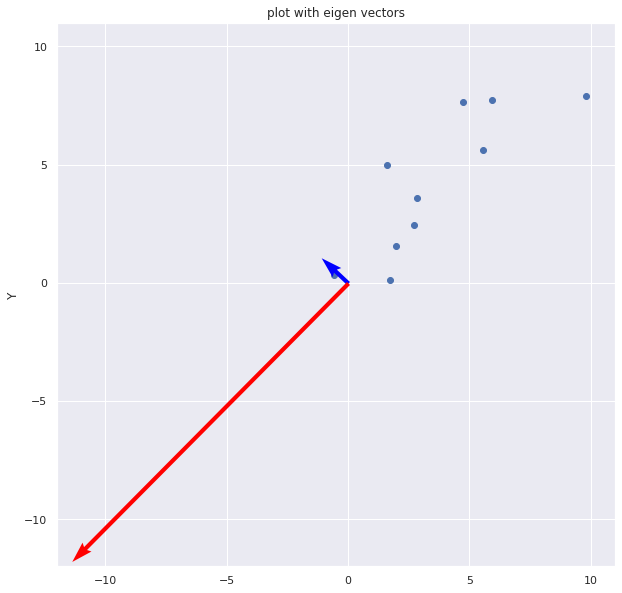

In [41]:
# Now plot this vector in 2D and then plot with dimetionality reduction
auxilary_vector = np.array([[ eigen_values[0] * eigen_vectors[0][0],eigen_values[0] * eigen_vectors[1][0]]])
main_vector   = np.array([[eigen_values[1] * eigen_vectors[0][1], eigen_values[1] * eigen_vectors[1][1]]])
X_aux, Y_aux = zip(*auxilary_vector)
X_main, Y_main= zip(*main_vector)


# Now plot 2D
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.set_ylabel('Y')
x = [x[0] for x in array_D]
y = [x[1] for x in array_D]
plt.scatter(x, y)
plt.quiver(X_aux, Y_aux,angles='xy', scale_units='xy', scale=1,color="blue")
plt.quiver(X_main, Y_main, angles='xy', scale_units='xy', scale=1,color="red")
plt.xlim([-12, 11])
plt.ylim([-12, 11])
ax.set_title('plot with eigen vectors')
plt.show()

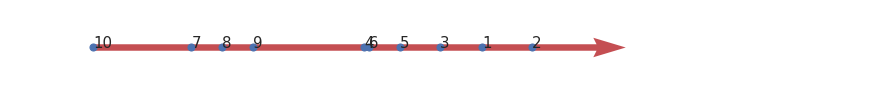

In [42]:
# Now plot on 1 D line

fig, ax = plt.subplots(1, 1,  figsize=(15.5,1.5))

origin=[np.min(pca_vector),0]

d = [0.8,0.0]

ax.quiver(*origin, *d, color=['r'], scale=1.3)
ax.scatter(pca_vector,[0]*10, s=50)

for i in range(0,10):
    ax.annotate(str(i+1), (pca_vector[i], 0), fontsize=15)

# ax.set_ylim(-0.01,0.01)
ax.set_xlim(-15,10)
ax.axis('off')
plt.show()